In [1]:
# logistic_regression_Caesarian.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

xy = np.loadtxt('caesarian.csv',delimiter=',',dtype=np.float32)

# train data set
x_data = xy[:56, :-1 ]
y_data = xy[:56, [-1] ]

x_train = np.array(x_data,dtype=np.float32)
y_train = np.array(y_data,dtype=np.float32)
x_train.shape,y_train.shape



((56, 5), (56, 1))

In [2]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}): 
        print('>>>myCallback:on_epoch_end',epoch)
        if(logs.get('loss') < 0.53):
            print('\nReached 53% loss so cancelling training!')
            self.model.stop_training = True
            
callbacks = myCallback() # 클래스의 인스턴스 생성


# Dense Layer 구현 : 2층
model = tf.keras.Sequential([
    # 첫번째 층 출력 : [None,20],   활성화 함수 : 'relu', metrics:['accuracy']
    tf.keras.layers.Dense(units=20,activation='relu',input_shape=(5,)) ,
    # 두번째 층 출력 : [Non,2],   활성화 함수 : 'relu'
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 학습
history = model.fit(x_train,y_train,epochs=700,batch_size=1,verbose=1,callbacks=[callbacks]) # verbose=1, 메세지를 출력

Epoch 1/700
56/56 [==============================] - 1s 1ms/step - loss: 1.3199 - accuracy: 0.5179
Epoch 2/700
56/56 [==============================] - 0s 1ms/step - loss: 0.7750 - accuracy: 0.6429
Epoch 3/700
56/56 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.6607
Epoch 4/700
56/56 [==============================] - 0s 1ms/step - loss: 0.7546 - accuracy: 0.6250
Epoch 5/700
56/56 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.6786
Epoch 6/700
56/56 [==============================] - 0s 970us/step - loss: 0.6409 - accuracy: 0.6071
Epoch 7/700
56/56 [==============================] - 0s 904us/step - loss: 0.8034 - accuracy: 0.6607
Epoch 8/700
56/56 [==============================] - 0s 929us/step - loss: 0.6406 - accuracy: 0.6786
Epoch 9/700
56/56 [==============================] - 0s 867us/step - loss: 0.6483 - accuracy: 0.6250
Epoch 10/700
56/56 [==============================] - 0s 871us/step - loss: 0.7712 - accuracy: 0.6071

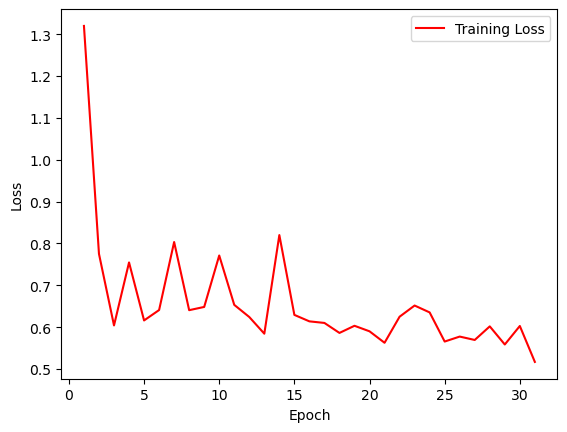

In [4]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [5]:
# 예측
preds = model.predict(x_train)
np.round(preds)

2/2 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [6]:
# 평가
x_data = xy[56:, :-1 ]
y_data = xy[56:, [-1] ]

x_test = np.array(x_data,dtype=np.float32)
y_test = np.array(y_data,dtype=np.float32)

model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 78ms/step - loss: 0.8323 - accuracy: 0.6667


[0.8323065638542175, 0.6666666865348816]

In [7]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}): 
        print('>>>myCallback:on_epoch_end',epoch)
        if(logs.get('loss') < 0.53):
            print('\nReached 53% loss so cancelling training!')
            self.model.stop_training = True
            
callbacks = myCallback() # 클래스의 인스턴스 생성


# Dense Layer 구현 : 3층
model = tf.keras.Sequential([
    # 첫번째 층 출력 : [None,20],   활성화 함수 : 'relu', metrics:['accuracy']
    tf.keras.layers.Dense(units=20,activation='relu',input_shape=(5,)) ,
    # 두번째 층 출력 : [Non,2],   활성화 함수 : 'relu'
    tf.keras.layers.Dense(units=2,activation='relu'),
    # 세번째 층 출력 : [Non,2],   활성화 함수 : 'relu'
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                120       
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 학습
history = model.fit(x_train,y_train,epochs=700,batch_size=1,verbose=1,callbacks=[callbacks]) # verbose=1, 메세지를 출력

Epoch 1/700
56/56 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.4464
Epoch 2/700
56/56 [==============================] - 0s 983us/step - loss: 0.6926 - accuracy: 0.5357
Epoch 3/700
56/56 [==============================] - 0s 942us/step - loss: 0.6947 - accuracy: 0.5357
Epoch 4/700
56/56 [==============================] - 0s 953us/step - loss: 0.6917 - accuracy: 0.5357
Epoch 5/700
56/56 [==============================] - 0s 981us/step - loss: 0.6924 - accuracy: 0.5357
Epoch 6/700
56/56 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5357
Epoch 7/700
56/56 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5357
Epoch 8/700
56/56 [==============================] - 0s 953us/step - loss: 0.6919 - accuracy: 0.5357
Epoch 9/700
56/56 [==============================] - 0s 965us/step - loss: 0.6918 - accuracy: 0.5357
Epoch 10/700
56/56 [==============================] - 0s 945us/step - loss: 0.6935 - accuracy: 0.

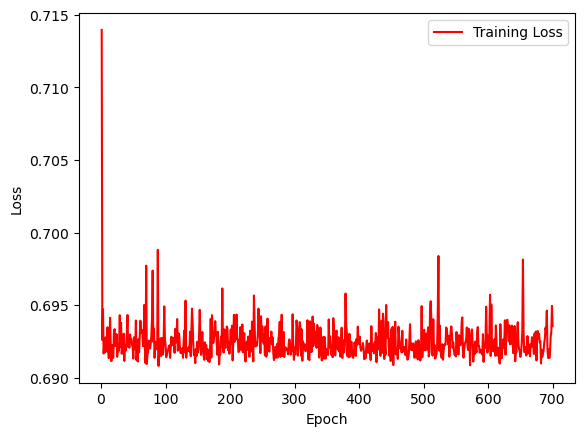

In [9]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
# 예측
preds = model.predict(x_train)
np.round(preds)

2/2 [==============================] - 0s 996us/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [11]:
# 평가
x_data = xy[56:, :-1 ]
y_data = xy[56:, [-1] ]

x_test = np.array(x_data,dtype=np.float32)
y_test = np.array(y_data,dtype=np.float32)

model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 62ms/step - loss: 0.6732 - accuracy: 0.6667


[0.6731500625610352, 0.6666666865348816]